In [ ]:
# Sales Prediction using Python
#Sales prediction is a critical tool for businesses, aiding in decision-making related to advertising costs and strategies. The project employs Python for machine learning to forecast future sales
#Key Components:
#Advertising Expenditure Analysis: Explore the impact of advertising costs on sales predictions.
#Audience Segmentation: Understand how different audience segments contribute to variations in sales.
#Platform Influence: Investigate the role of advertising platforms in shaping sales outcomes.
#Implementation:
#Python will be the primary tool for implementing machine learning models. Techniques such as regression analysis and predictive modeling will be employed.
#Outcome:
#The project aims to deliver a robust sales prediction model, enabling businesses to make data-driven decisions, optimize advertising strategies, and enhance operational efficiency.



In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [4]:
df = pd.read_csv("/content/Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
# Dataset first View
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
# Dataset Rows and columns count
print("Number of rows are:",df.shape[0])
print("Number of columns are:",df.shape[1])

Number of rows are: 200
Number of columns are: 5


In [7]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
# Duplicate values
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


In [9]:
# Missing values
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [10]:
# Understanding the variables
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [12]:
# Unique varibles
df.nunique()

,0
Unnamed: 0,200
TV,190
Radio,167
Newspaper,172
Sales,121


In [13]:
# Dependent variable
dependent_variable = df['Sales']
dependent_variable

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


Text(0, 0.5, 'Sales')

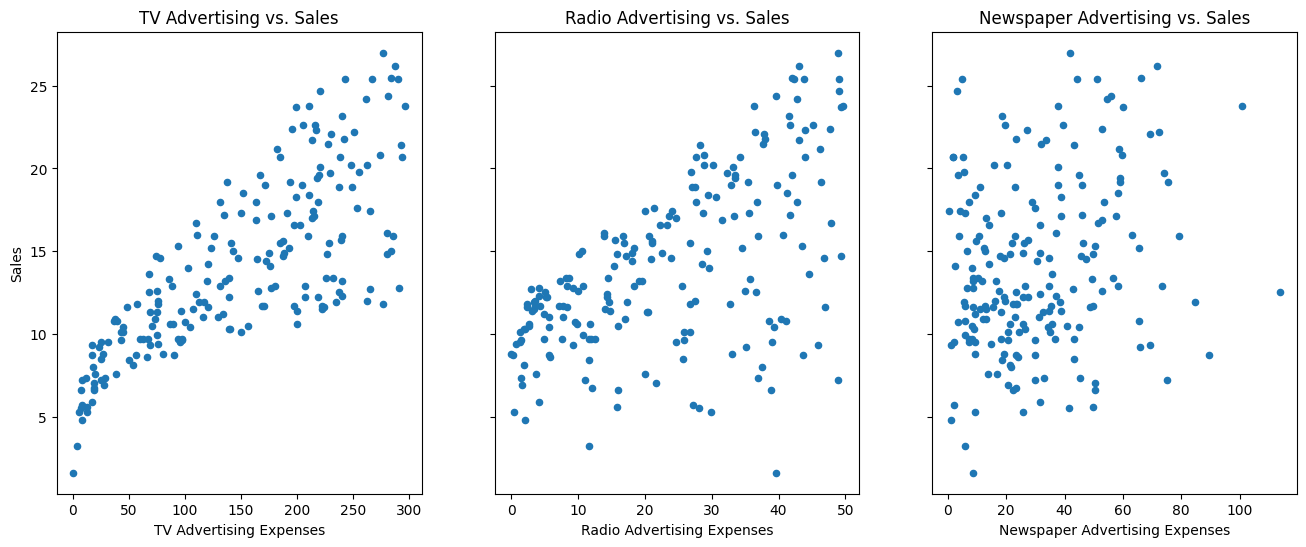

In [14]:
# Data Visualisation
# Numerical VS Target Variable
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 6))
# Scatter plot for TV vs. Sales
df.plot(kind="scatter", x='TV', y='Sales', ax=axs[0])
axs[0].set_title('TV Advertising vs. Sales')
axs[0].set_xlabel('TV Advertising Expenses')
axs[0].set_ylabel('Sales')
# Scatter plot for Radio vs. Sales
df.plot(kind="scatter", x='Radio', y='Sales', ax=axs[1])
axs[1].set_title('Radio Advertising vs. Sales')
axs[1].set_xlabel('Radio Advertising Expenses')
axs[1].set_ylabel('Sales')
# scatter plot for Newspaper advertising vs. Sales
df.plot(kind="scatter", x='Newspaper', y='Sales', ax=axs[2])
axs[2].set_title('Newspaper Advertising vs. Sales')
axs[2].set_xlabel('Newspaper Advertising Expenses')
axs[2].set_ylabel('Sales')


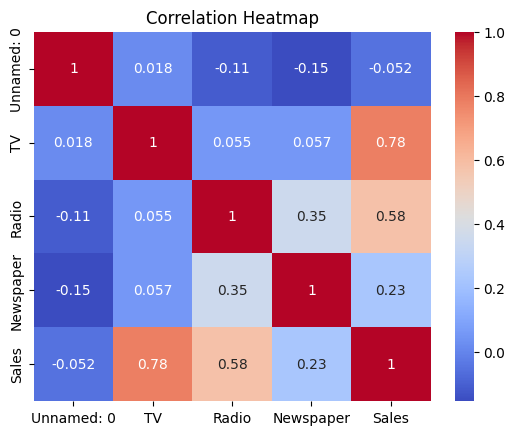

In [15]:
# Correation Heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

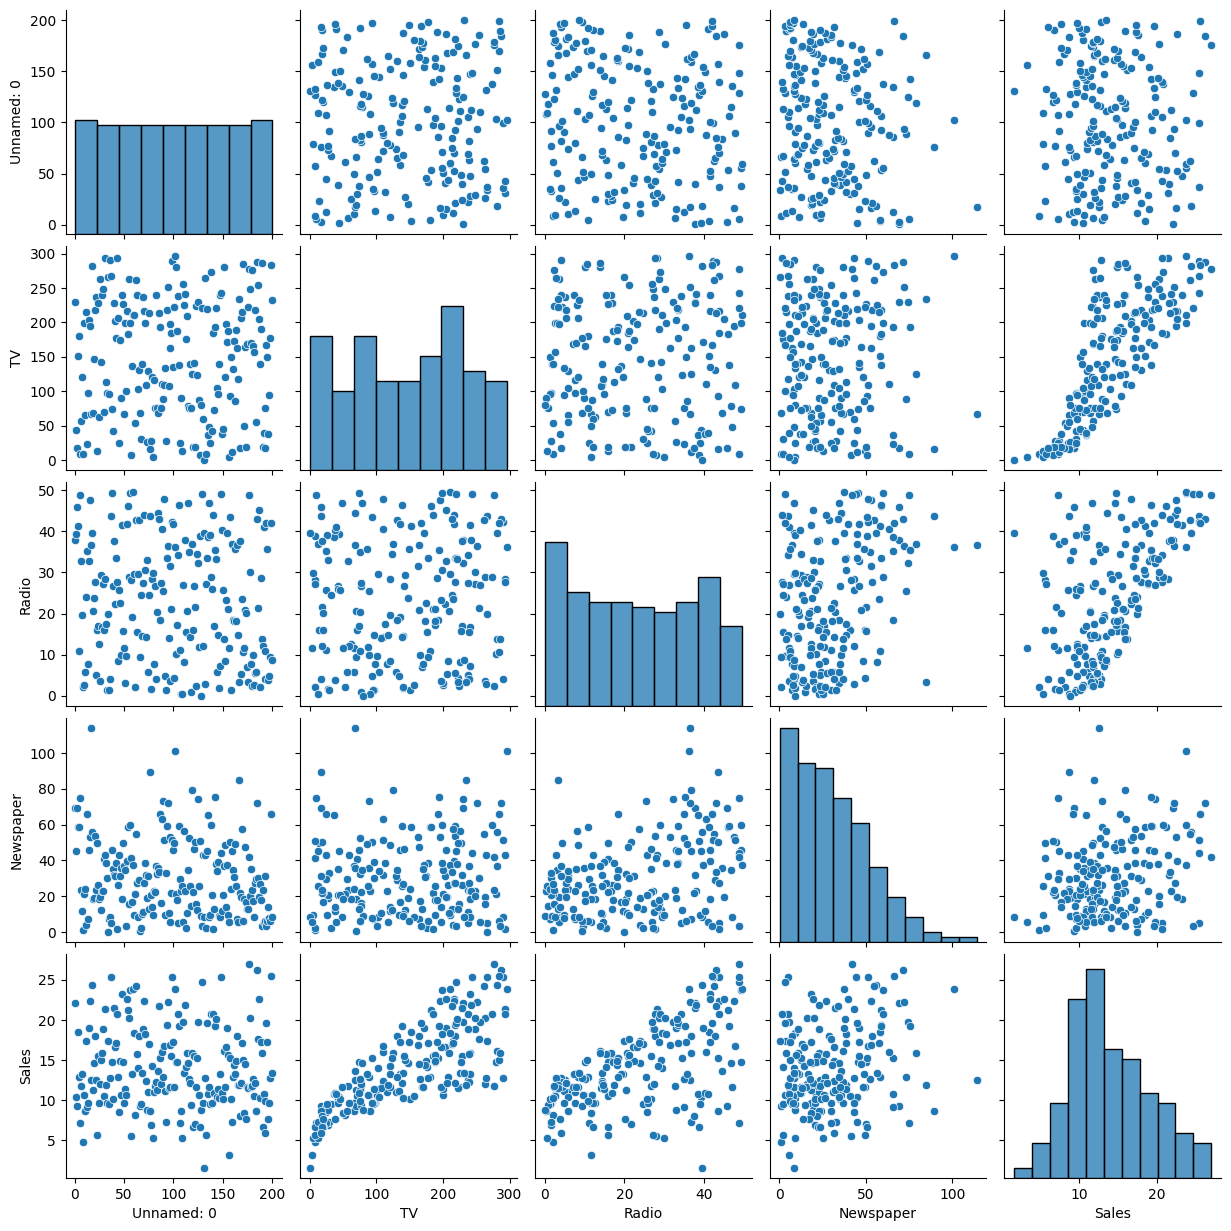

In [16]:
# Pair Plot
sns.pairplot(df)
plt.show()

In [17]:
# Handling Outlairs
# Removing the outlier from newspaper
df=df[df['Newspaper']<90]
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [18]:
# Feature selection
# select the features wisely to avoid overfitting
features = [i for i in df.columns if i not in ['Sales']]
features

['Unnamed: 0', 'TV', 'Radio', 'Newspaper']

In [19]:
# Skew dependent variable
df['Sales'].skew()

np.float64(0.4071300154120368)

In [20]:
# Data Scaling
features = [i for i in df.columns if i not in ['Sales']]
scaler = StandardScaler()
X = scaler.fit_transform(df[features])


In [21]:
Y = df['Sales']

In [35]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [36]:
# Train distribution of dependent variable
Y_train.value_counts()

,count
Sales,
9.7,4
8.7,3
12.2,3
20.7,3
15.9,3
...,...
20.1,1
16.7,1
12.4,1


In [37]:
# ML Model Implementation
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):
    # Calculating Evaluation Matrix
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,y_pred)
    y_train_pred = model.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    r2 = r2_score(y_test,y_pred)
    r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))
    # Printing Evaluation Matrix
    print("MSE :" , mse)
    print("RMSE :" ,rmse)
    print("MAE :" ,mae)
    print("Train R2 :" ,r2_train)
    print("Test R2 :" ,r2)
    print("Adjusted R2 : ", r2_adjusted)
    # plot actual and predicted values
    plt.figure(figsize=(12,4))
    plt.plot((y_pred)[:100])
    plt.plot((np.array(y_test)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.title('Actual and Predicted Sales', fontsize=12)
    model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
    return model_score

In [38]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

In [39]:
# Linear regression
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, Y_train)

# Predict on the model
Y_pred_li = reg.predict(X_test)

MSE : 2.4656559237699893
RMSE : 1.5702407215997136
MAE : 1.1783718225254571
Train R2 : 0.8900781387235441
Test R2 : 0.9086505674932552
Adjusted R2 :  0.8982106323496273


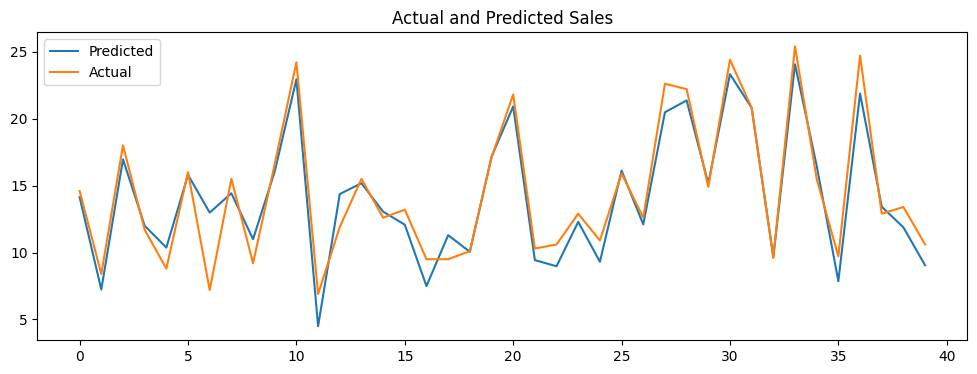

In [41]:
# Visualizing evaluation Metric Score chart
linear_score = evaluate_model(reg, y_test, Y_pred_li)
score['Linear regression'] = linear_score

In [45]:
# Cross Validation and Hyperparameter tuning

# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'fit_intercept': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [46]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'fit_intercept': True}
Best R2 score:  0.8784305743828755


In [47]:
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression()

MSE : 2.4656559237699893
RMSE : 1.5702407215997136
MAE : 1.1783718225254571
Train R2 : 0.8900781387235441
Test R2 : 0.9086505674932552
Adjusted R2 :  0.8982106323496273


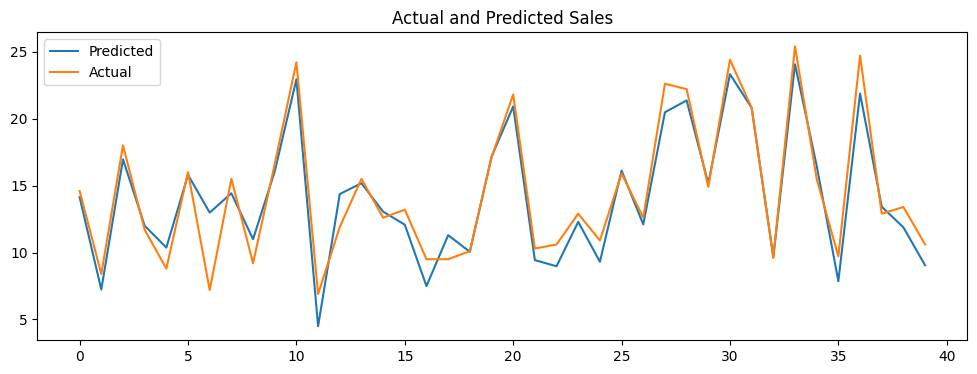

In [48]:
# Predict on test data
y_pred_li2 = best_reg.predict(X_test)


# Visualizing evaluation Metric Score chart
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2

In [49]:
# Decision tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


MSE : 1.5692499999999998
RMSE : 1.252697090281605
MAE : 0.9825000000000002
Train R2 : 1.0
Test R2 : 0.9418612728648583
Adjusted R2 :  0.9352168469065564


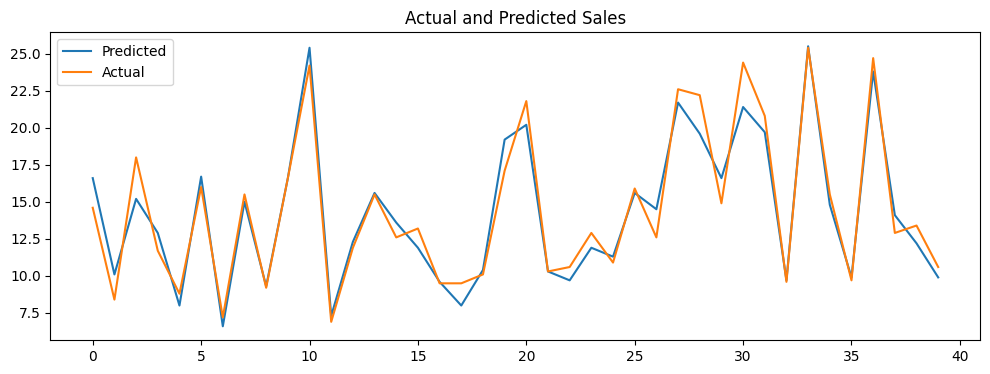

In [50]:
# Visualising evaluation Metric score
dt_score = evaluate_model(dt, y_test, y_pred_dt)
score['Decision Tree'] = dt_score

In [51]:
# Cross validation and hyperparameter Tuning
# Regressor
dt_model = DecisionTreeRegressor(random_state=1)

# Hyperparameter Grid
grid = {'max_depth' : [8,10,12,14,16],
        'min_samples_split' : np.arange(35,50),
        'min_samples_leaf' : np.arange(22,31,2)}

# Fitting model with hypertuned paramaters using grid search
dt_gridsearch = GridSearchCV(dt_model,
                             grid,
                             cv=6,
                             scoring= 'neg_root_mean_squared_error')
dt_gridsearch.fit(X_train,y_train)
dt_best_params = dt_gridsearch.best_params_


dt_best_params


{'max_depth': 8,
 'min_samples_leaf': np.int64(22),
 'min_samples_split': np.int64(35)}

In [54]:
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],
                                 min_samples_leaf=dt_best_params['min_samples_leaf'],
                                 min_samples_split=dt_best_params['min_samples_split'],
                                 random_state=1)
dt_model.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=8, min_samples_leaf=np.int64(22),
                      min_samples_split=np.int64(35), random_state=1)

MSE : 4.853930208143661
RMSE : 2.2031636816504716
MAE : 1.7902569055944055
Train R2 : 0.8705971402540121
Test R2 : 0.8201680268253714
Adjusted R2 :  0.7996158013196996


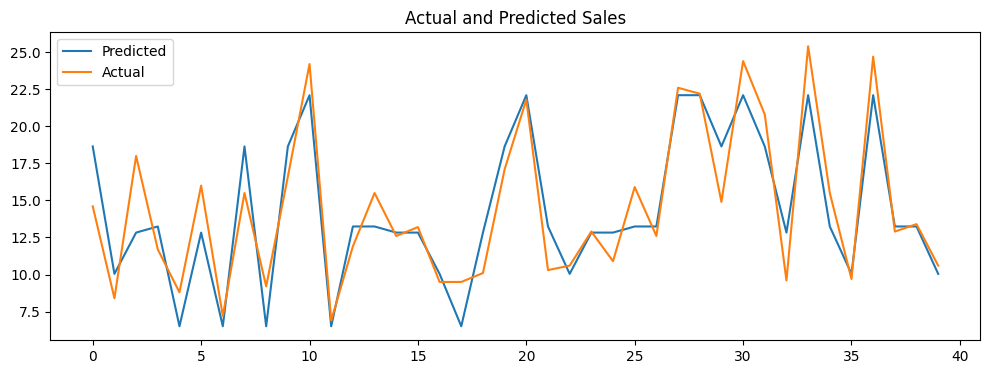

In [55]:
# Predict on the model
y_pred_dt = dt_model.predict(X_test)


# Evaluation matrices for DecisionTree
result = evaluate_model(dt_model, y_test,y_pred_dt)
score['Decision tree tuned'] = result